In [1]:
import os
import sys

import numpy as np
import pandas as pd
import scipy as sp

import seaborn as sns
import matplotlib.pyplot as plt

PROJ_ROOT =  os.path.join(os.pardir)

print(os.path.abspath(PROJ_ROOT))

d:\DANIELA\Projects\WIDS\covid-outcomes-research


In [2]:
#Let your audience know when this notebook was run, and with which packages. Useful when you are not sharing the notebook as
#executable code.

%pip install watermark

Note: you may need to restart the kernel to use updated packages.


In [3]:
%load_ext watermark

In [4]:
%watermark -a "Daniela Alvarez Zegarra" -d -t -v -p numpy,pandas

Author: Daniela Alvarez Zegarra

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.3.0

numpy : 1.21.5
pandas: 1.4.2



In [5]:
#Documentation to know what other info can i get with watermark

%watermark?

Docstring:
::

  %watermark [-a AUTHOR] [-gu GITHUB_USERNAME] [-e EMAIL] [-ws WEBSITE]
                 [-d] [-n] [-t] [-i] [-z] [-u] [-c CUSTOM_TIME] [-v]
                 [-p PACKAGES] [-co] [-h] [-m] [-g] [-r] [-b] [-w] [-iv]

IPython magic function to print date/time stamps
and various system information.

optional arguments:
  -a AUTHOR, --author AUTHOR
                        prints author name
  -gu GITHUB_USERNAME, --github_username GITHUB_USERNAME
                        prints author github username
  -e EMAIL, --email EMAIL
                        prints author email
  -ws WEBSITE, --website WEBSITE
                        prints author or project website
  -d, --date            prints current date as YYYY-mm-dd
  -n, --datename        prints date with abbrv. day and month names
  -t, --time            prints current time as HH-MM-SS
  -i, --iso8601         prints the combined date and time including the time
                        zone in the ISO 8601 standard with UTC off

In [6]:
#Let's print our requirements

print(open(os.path.join(PROJ_ROOT,'requirements.txt')).read())

# local package
-e .

# external requirements
click
Sphinx
coverage
awscli
flake8
python-dotenv>=0.5.1
jupyter
ipython
numpy
pandas
matplotlib
scikit-learn
scipy
pytest
nbdime
runipy
seaborn



## Loading the Data

In [7]:
merged_data_path = os.path.join(PROJ_ROOT,
                          "data",
                          "interim",
                          "merged_dataframe.csv")


In [8]:
df = pd.read_csv(merged_data_path)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 74 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Unnamed: 0                                                                     3140 non-null   int64  
 1   fips                                                                           3140 non-null   int64  
 2   TOT_POP                                                                        3140 non-null   int64  
 3   0-9                                                                            3140 non-null   int64  
 4   10-19                                                                          3140 non-null   int64  
 5   20-29                                                                          3140 non-null   int64  
 6   30-39                   

In [10]:
df.drop('Unnamed: 0', axis=1, inplace=True)

# Milestone I: Exploratory data analysis

**Looking for correlations**

In [11]:
num_cols = df.select_dtypes(['int', 'float']).columns

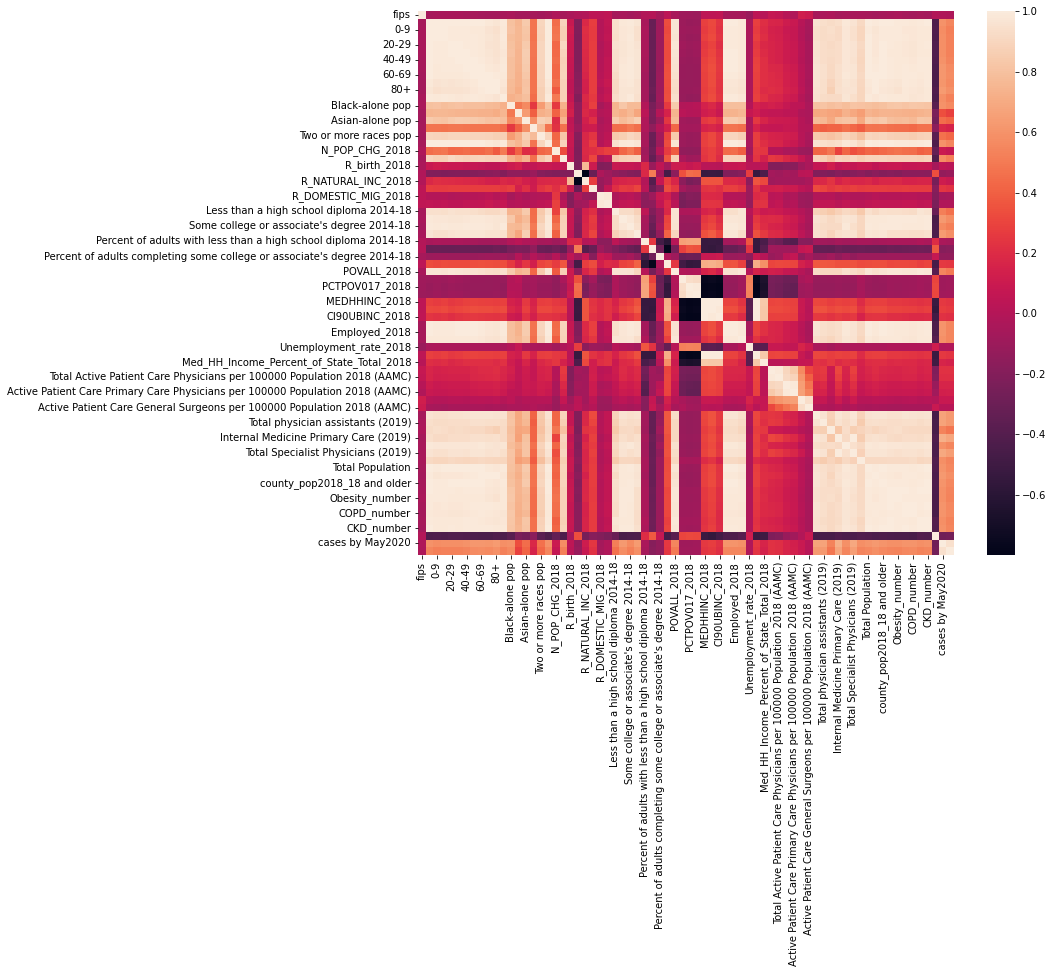

In [12]:
fig = plt.figure(figsize=(12,10))
cor_matrix = pd.concat([df[num_cols]], axis = 1).corr()
sns.heatmap(cor_matrix)
plt.show()

**Looking for outliers**

In [13]:
df.describe()

,fips,TOT_POP,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,...,county_pop2018_18 and older,anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,Urban_rural_code,cases by May2020,deaths by May2020
count,3140.000000,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,...,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,2.889000e+03,2889.000000
mean,30401.640764,1.041894e+05,1.274030e+04,1.336798e+04,1.446933e+04,1.391649e+04,1.288521e+04,1.363803e+04,1.191621e+04,7220.310510,...,8.081460e+04,3.338540e+04,2.527613e+04,5597.593312,5827.242357,9326.577707,2466.234076,4.635350,1.055551e+04,479.408446
std,15150.559265,3.335834e+05,4.180730e+04,4.228439e+04,4.957773e+04,4.899095e+04,4.347219e+04,4.272063e+04,3.451858e+04,20287.498429,...,2.585190e+05,9.888669e+04,7.446684e+04,15615.285499,15720.551934,29754.601185,7730.422067,1.510447,5.986556e+04,2896.485464
min,1001.000000,8.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,4.000000e+00,1.400000e+01,2.000000e+01,6.000000,...,8.800000e+01,4.100000e+01,2.500000e+01,7.000000,7.000000,11.000000,3.000000,1.000000,1.000000e+00,0.000000
25%,18180.500000,1.096325e+04,1.280500e+03,1.374500e+03,1.263750e+03,1.232750e+03,1.245250e+03,1.483000e+03,1.476500e+03,950.750000,...,8.460250e+03,4.215000e+03,3.075000e+03,798.500000,815.000000,1187.750000,314.750000,3.000000,1.950000e+02,0.000000
50%,29178.000000,2.580050e+04,3.057000e+03,3.274000e+03,3.108000e+03,3.000500e+03,3.048500e+03,3.515500e+03,3.410000e+03,2177.000000,...,2.023000e+04,9.753000e+03,7.182500e+03,1814.500000,1963.500000,2743.000000,718.000000,5.000000,7.560000e+02,17.000000
75%,45081.500000,6.791300e+04,8.097000e+03,8.822250e+03,8.976250e+03,8.314250e+03,8.120500e+03,9.157250e+03,8.710500e+03,5574.000000,...,5.282025e+04,2.500125e+04,1.854250e+04,4376.000000,4727.000000,6679.250000,1776.250000,6.000000,3.233000e+03,107.000000
max,56045.000000,1.010552e+07,1.208253e+06,1.239139e+06,1.557073e+06,1.501844e+06,1.350076e+06,1.306003e+06,1.014325e+06,572530.000000,...,7.916625e+06,2.877316e+06,2.097906e+06,434790.000000,434075.000000,952335.000000,237766.000000,6.000000,1.296141e+06,67222.000000


In [14]:
#creating a function to visualize outliers

def outliers(feature): 
    plt.figure(figsize=(14,6))

    plt.subplot(1,2,1)
    sns.boxplot(df[feature])

    plt.subplot(1,2,2)
    sns.histplot(df[feature], bins = 5)

    plt.show()

c:\Users\danie\anaconda3\envs\covid-outcomes-research\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


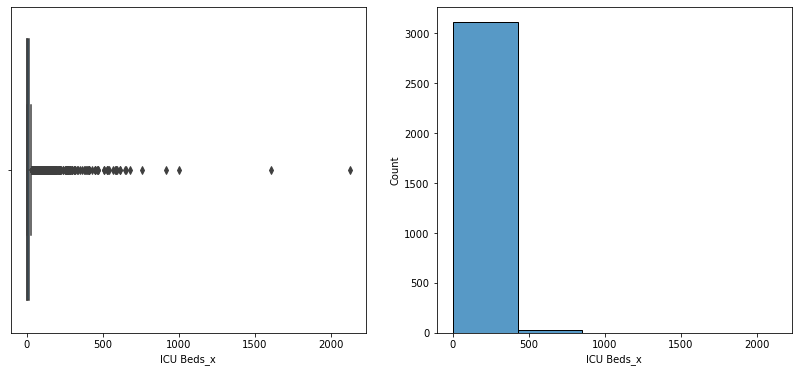

In [15]:
outliers('ICU Beds_x')

c:\Users\danie\anaconda3\envs\covid-outcomes-research\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


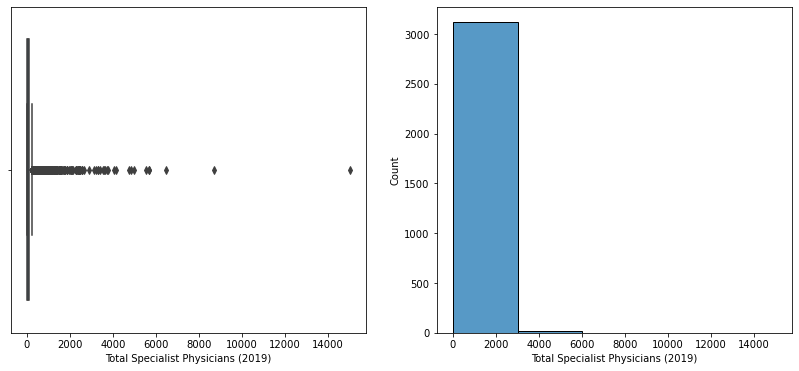

In [16]:
outliers('Total Specialist Physicians (2019)')

c:\Users\danie\anaconda3\envs\covid-outcomes-research\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


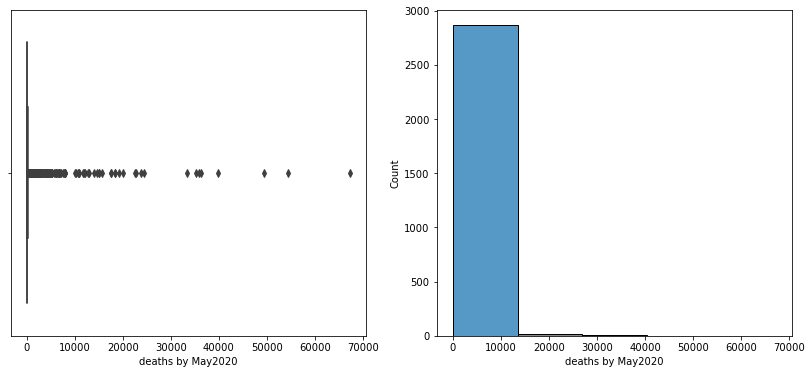

In [17]:
outliers('deaths by May2020')

**Density plots**


In [18]:
#for eda

def kde_plot(dataframe, variable, upper=None, lower=None, bw=0.1):
    '''Plots a density plot for a variable with optional upper and lower bounds on the data (inclusive)'''
    
    plot_data = dataframe [variable]
    
    if upper is not None:
        plot_data = plot_data[plot_data <= upper]
    if lower is not None:
        plot_data = plot_data[plot_data >= lower]
        
    sns.kdeplot(plot_data, bw=bw)
    
    plt.savefig(os.path.join(PROJ_ROOT, "reports", "figures","{}.png".format(variable)))
    plt.show()


c:\Users\danie\anaconda3\envs\covid-outcomes-research\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


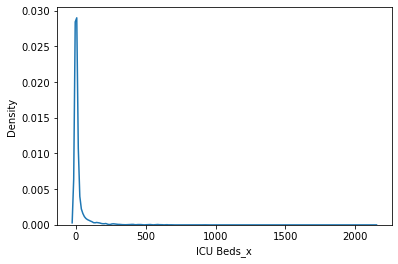

In [19]:
kde_plot(df, 'ICU Beds_x')

c:\Users\danie\anaconda3\envs\covid-outcomes-research\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


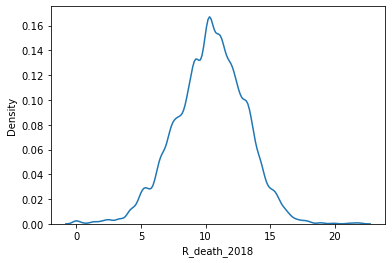

In [20]:
kde_plot(df, 'R_death_2018')

c:\Users\danie\anaconda3\envs\covid-outcomes-research\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


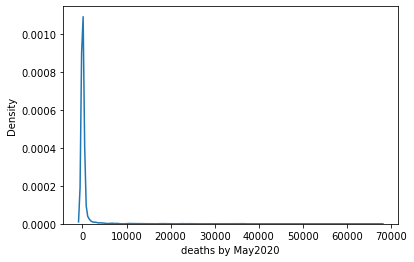

In [21]:
kde_plot(df, 'deaths by May2020')

c:\Users\danie\anaconda3\envs\covid-outcomes-research\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


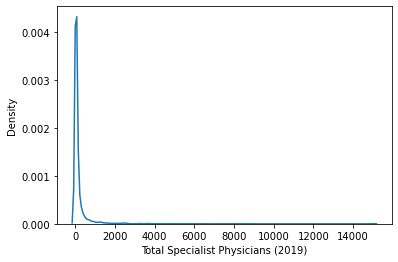

In [22]:
kde_plot(df, 'Total Specialist Physicians (2019)')

## Feature scaling

**Obtain the feature matrix**

In [23]:
#first, we will create a dataframe with the names for each fips code, then drop our county_names columns from main df, and we will set our fips code as index
names_df = df[['fips', 'COUNTY_NAME']]
df.drop('COUNTY_NAME', axis=1, inplace=True)

In [24]:
df.set_index('fips')

,TOT_POP,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,county_pop2018_18 and older,anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,Urban_rural_code,cases by May2020,deaths by May2020
fips,,,,,,,,,,,,,,,,,,,,,
1001,55601,6787,7637,6878,7089,7582,7738,5826,4050,2014,...,42438,20181,15193,3345,3644,5462,1326,3,1611.0,90.0
1003,218022,24757,26913,23579,25213,27338,29986,29932,20936,9368,...,170912,68790,50761,13414,14692,20520,5479,4,5621.0,124.0
1005,24881,2732,2960,3268,3201,3074,3278,3076,2244,1048,...,19689,11325,8013,2159,2373,3870,887,6,1193.0,15.0
1007,22400,2456,2596,3029,3113,3038,3115,2545,1723,785,...,17813,9190,6894,1533,1789,2511,595,2,1234.0,6.0
1009,57840,7095,7570,6742,6884,7474,7844,6965,4931,2335,...,44448,20584,15112,4101,4661,6017,1507,2,1171.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,43051,6104,6326,5359,6577,5334,5261,4943,2198,949,...,31761,12796,10672,1862,2098,2834,821,5,606.0,0.0
56039,23081,2384,2185,2967,4093,3423,2928,2875,1569,657,...,18842,4576,3655,981,928,1360,447,5,3577.0,21.0
56041,20299,3121,3205,2153,2702,2390,2434,2554,1233,507,...,14455,6101,4944,1034,1163,1500,430,5,250.0,0.0


In [25]:
X = df.values
X.shape

(3140, 72)

**Standarize the features**

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

**Choose the right number of dimensions**

In [ ]:
from sklearn.decomposition import PCA

pca_72 = PCA(n_components=72, random_state=2022)
pca_72.fit(X_scaled)
X_pca_72 = pca_72.transform(X_scaled)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Modeling 

1. Dimensionality reduction
2. CLustering

**Loading local development files**
If I am just loading local python files that I expect to use in this project, I add the src folder to the python  path using
sys.path.append. This tells Python to look in that folder for modules that we can import. This works well for local code and notebooks.

In [ ]:
'''
#Load the autoreload extension
%load_ext autoreload

#always reload modules marked with %aimport
%autoreload 1

#add local python functions
import os
import sys

#add the src directory as one where we can import modules from
src_dir = os.path.join(os.getcwd(),os.pardir,"src")
sys.path.append(src_dir)

#import my method from the source code
%aimport features.build_features
from features.build_features import join_dataframes
from features.build_features import remove_invalid_data
'''


**#lifehack If something goes wrong, use %debug**